In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
diabetes = pd.read_csv(f'data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


Задание 8.1
1 point possible (graded)
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [52]:
duplicates_cols = list(diabetes.columns)
diabetes_nodubles = diabetes.drop_duplicates(subset=duplicates_cols)
diabetes_nodubles.shape[0]

768

Задание 8.2
1 point possible (graded)
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [53]:
noninformative_features=[]

for col in diabetes_nodubles.columns:
    most_common = diabetes_nodubles[col].value_counts(normalize=True).max()
    num_of_unique = diabetes_nodubles[col].nunique() / diabetes_nodubles[col].count()
    if most_common > 0.95:
        print(col, ': признак имеет более 95% одниковых значений')
        noninformative_features.append(col)
    if num_of_unique > 0.95:
        print(col, ': признак имеет более 95% процентов уникальных значений')
        noninformative_features.append(col)
cleaned_diabetes = diabetes_nodubles.drop(noninformative_features, axis=1)

cleaned_diabetes.info()

Gender : признак имеет более 95% одниковых значений
<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Задание 8.3
1 point possible (graded)
Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [54]:
cols = list(cleaned_diabetes.columns)
cols.remove('Pregnancies')
cols.remove('Outcome')

for col in cols:
    cleaned_diabetes[col] = cleaned_diabetes[col].apply(lambda x: np.nan if x == 0 else x)

cleaned_diabetes.isnull().sum()

#cleaned_diabetes['Insulin'].isnull().mean() * 100
cleaned_diabetes.isnull().mean() * 100


Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Задание 8.4
1/1 point (graded)
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [55]:
thresh = cleaned_diabetes.shape[0] * 0.7
cleaned_diabetes = cleaned_diabetes.dropna(thresh=thresh, axis=1)
cleaned_diabetes.shape[1]

8

Задание 8.5
1/1 point (graded)
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [56]:
thresh = cleaned_diabetes.shape[1] - 2
cleaned_diabetes = cleaned_diabetes.dropna(thresh=thresh, axis=0)
cleaned_diabetes.shape[0]

761

Задание 8.6
1 point possible (graded)
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [57]:
cleaned_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [58]:
values = {
    'Glucose': cleaned_diabetes['Glucose'].median(),
    'BloodPressure': cleaned_diabetes['BloodPressure'].median(),
    'SkinThickness': cleaned_diabetes['SkinThickness'].median(),
    'BMI': cleaned_diabetes['BMI'].median()
}

cleaned_diabetes = cleaned_diabetes.fillna(values)
cleaned_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
round(cleaned_diabetes['SkinThickness'].mean(), 1)

29.1

Задание 8.7
1 point possible (graded)
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [60]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(cleaned_diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


Задание 8.8
1 point possible (graded)
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

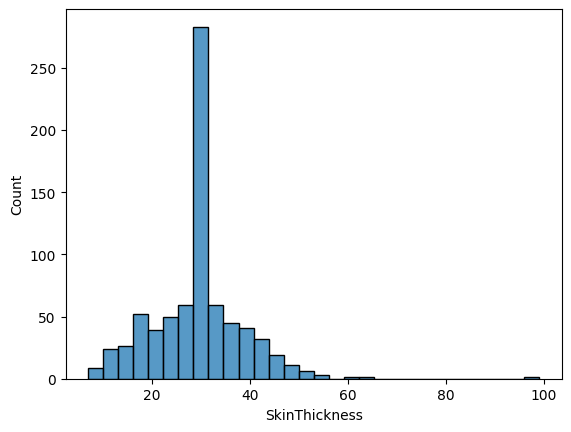

In [61]:
histplot = sns.histplot(cleaned_diabetes['SkinThickness'], bins = 30)

In [62]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(cleaned_diabetes, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


Задание 8.9
1 point possible (graded)
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [63]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(cleaned_diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [64]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers_log, cleaned = outliers_iqr_mod(cleaned_diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 761


In [65]:
print(outliers.shape[0] - outliers_log.shape[0])

29


In [66]:
competitor_prices = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
company_prices = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')

In [67]:
competitor_prices.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


In [68]:
competitor_prices['producer_id'] = competitor_prices['producer_id'].apply(
    lambda x: x.replace('_', '')
    )
competitor_prices.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,bla//ck,196
4,Valentino,Shoes,aaaaa111115,bla\\ck,250


In [69]:
def replace_symbol(text: str) -> str:
    """_summary_

    Args:
        text (str): _description_

    Returns:
        str: _description_
    """
    for symbol in text:
        if symbol in '_, -, ~, \\, /':
            text = text.replace(symbol, '')
    return text
competitor_prices['producer_color'] = competitor_prices['producer_color'].apply(
    replace_symbol
)
competitor_prices.head()


,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250


In [73]:
company_prices

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [81]:
company_prices_to_merge = company_prices[['item_id', 'color_id', 'current price']]
merged_data_prices = competitor_prices.merge(
    company_prices_to_merge,
    left_on='producer_id',
    right_on='item_id',
    how='left'
)

merged_data_prices['price_diff'] = round(merged_data_prices['current price'] / merged_data_prices['price'] * 100, 2)

